In [1]:
import rpy2

%load_ext rpy2.ipython

# S1 Table over sample size per species and the species included in the analysis 

In [2]:
%%R
library(tidyverse)

df <- read_delim('../results/model/Nested_model/Reduced_Ne_Pi_recomb.csv')
samples <- read_delim('../data/PDGP_metadata.txt') %>% mutate(full_species = paste(Genus, Species, sep = '_'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
New names:
• `` -> `...1`
Rows: 5071829 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): genus, species, full_species, chr
dbl (8): ...1, MEAN, MEDIAN, NE_MEAN, NE_MEDIAN, freq_mean, cm_per_mb, PI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 810 Columns: 6
── Column specification ───────────

In [3]:
%%R
total_sample_count <- samples %>% 
    group_by(full_species) %>%
    reframe(
        count = n())
total_sample_count

# A tibble: 234 × 2
   full_species                count
   <chr>                       <int>
 1 Allenopithecus_nigroviridis     2
 2 Allochrocebus_lhoesti           2
 3 Allochrocebus_preussi           1
 4 Allochrocebus_solatus           1
 5 Alouatta_belzebul               1
 6 Alouatta_caraya                 2
 7 Alouatta_discolor               2
 8 Alouatta_juara                  2
 9 Alouatta_macconnelli            5
10 Alouatta_nigerrima              2
# ℹ 224 more rows
# ℹ Use `print(n = ...)` to see more rows


In [4]:
%%R
#table_s1 <-
unique_species <- df %>% 
    reframe(
        full_species = unique(full_species))

unique_species

# A tibble: 187 × 1
   full_species               
   <chr>                      
 1 Allenopithecus_nigroviridis
 2 Allochrocebus_lhoesti      
 3 Allochrocebus_preussi      
 4 Allochrocebus_solatus      
 5 Alouatta_belzebul          
 6 Alouatta_caraya            
 7 Alouatta_discolor          
 8 Alouatta_juara             
 9 Alouatta_macconnelli       
10 Alouatta_nigerrima         
# ℹ 177 more rows
# ℹ Use `print(n = ...)` to see more rows


In [5]:
%%R
table_s1 <- total_sample_count %>% filter(full_species %in% unique_species$full_species)
table_s1

# A tibble: 187 × 2
   full_species                count
   <chr>                       <int>
 1 Allenopithecus_nigroviridis     2
 2 Allochrocebus_lhoesti           2
 3 Allochrocebus_preussi           1
 4 Allochrocebus_solatus           1
 5 Alouatta_belzebul               1
 6 Alouatta_caraya                 2
 7 Alouatta_discolor               2
 8 Alouatta_juara                  2
 9 Alouatta_macconnelli            5
10 Alouatta_nigerrima              2
# ℹ 177 more rows
# ℹ Use `print(n = ...)` to see more rows


In [9]:
%%R
knitr::kable(table_s1)
write.csv(table_s1,'tabel_s1.csv', row.names = F)

# s3 Table of the mapping process, per reference genome 

In [12]:
%%R
mapping_sucess <- read_delim('supplementary_figures/liftover_mapped_unmapped.tsv', delim = '\t')


Rows: 27 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Reference_genome
dbl (2): Total_Entries, Failed_to_Map

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
%%R
table_s2 <- mapping_sucess %>% mutate(fraction = Failed_to_Map / Total_Entries)

In [14]:
%%R
knitr::kable(table_s2)
write.csv(table_s2,'tabel_s2.csv', row.names = F)

# s4 table of windows kept at different filtering levels 

In [15]:
%%R



total_no_x <- df %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    reframe(
        total = n())

callability20 <- df %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.2) %>%
    reframe(
        call20 = n())

callability40 <- df %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.4) %>%
    reframe(
        call40 = n())

callability50 <- df %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.5) %>%
    reframe(
        call50 = n())

callability60 <- df %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.6) %>%
    reframe(
        call60 = n())

callability70 <- df %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.7) %>%
    reframe(
        call70 = n())

callability80 <- df %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.8) %>%
    reframe(
        call80 = n())

callability90 <- df %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.9) %>%
    reframe(
        call90 = n())

callability95 <- df %>%
    filter(!(chr=='chrX')) %>%
    group_by(genus,species) %>%
    filter(freq_mean > 0.95) %>%
    reframe(
        call95 = n())

kept_windows <- list(total_no_x, callability20, callability40,  callability50, callability60, callability70, callability80, callability90, callability95) %>% reduce(inner_join, by = c('species',"genus"))


In [16]:
%%R
kept_windows <- kept_windows %>% mutate(full_species = paste(genus, species, sep = '_'))


In [17]:
%%R
fraction_retained <- kept_windows %>% group_by(full_species) %>%
    reframe(
        frac20=call20/total,
        frac40=call40/total,
        frac50=call50/total,
        frac60=call60/total,
        frac70=call70/total,
        frac80=call80/total,
        frac90=call90/total,
        frac95=call95/total)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


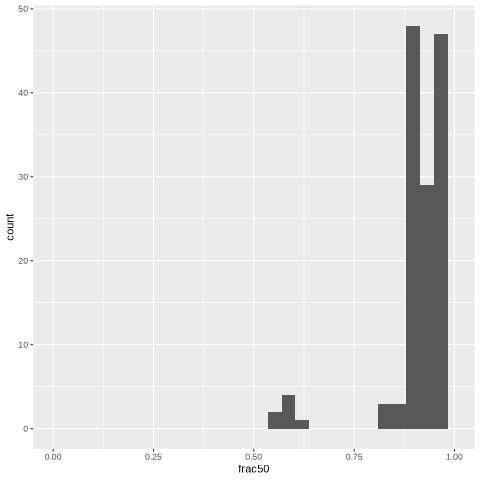

In [18]:
%%R
ggplot(data = fraction_retained, aes(x=frac50))+
    geom_histogram()+
    xlim(0,1)

In [19]:
%%R
min(fraction_retained$frac50)



[1] 0.5462185


In [20]:
%%R
max(fraction_retained$frac50)

[1] 0.9638582


In [22]:
%%R
knitr::kable(fraction_retained)
write.csv(fraction_retained,'tabel_s3.csv', row.names = F)